# California Housing Price
reference : exercise in chapter 2 of 'Hands-On Machine Learning with Scikit-learn and Tensorflow' by Aurélien Géron.

##### Tip> shortcuts for Jupyter Notebook
* Ctrl + Enter : run cell
* Shift + Enter : run cell and select below

## 0. Numpy and Pandas

### - Numpy
A python library that supports for large, multi-dimensional arrays and matrices

In [40]:
import numpy as np

In [41]:
py_arr = [1,2,3,4,5,6]
py_arr

[1, 2, 3, 4, 5, 6]

In [42]:
type(py_arr)

list

In [43]:
py_arr + [5]

[1, 2, 3, 4, 5, 6, 5]

In [44]:
py_arr * 2

[1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6]

In [45]:
np_arr = np.array([1,2,3,4,5,6])
np_arr

array([1, 2, 3, 4, 5, 6])

In [46]:
type(np_arr)

numpy.ndarray

In [47]:
np_arr + 5

array([ 6,  7,  8,  9, 10, 11])

In [48]:
np_arr * 2

array([ 2,  4,  6,  8, 10, 12])

In [49]:
np_arr = np.empty((5,2))
np_arr

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [50]:
np_arr = np.zeros((5, 2))

In [51]:
np_arr_1 = np.array([[1,2,3,4],
                     [5,6,7,8],
                     [9,10,11,12]])
np_arr_1

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [52]:
np_arr_1 * [1,2,3,4]

array([[ 1,  4,  9, 16],
       [ 5, 12, 21, 32],
       [ 9, 20, 33, 48]])

### - Pandas

A python library for data manipulation and analysis.

Pandas has two data structures.
One is Series and the other is DataFrame.

    Series is a one-dimensional labeled array capable of holding data of any type (integer, string, float, python objects, etc.)

    Dataframe is two-dimensional size-mutable data structure with labeled axes (rows and columns)

In [53]:
import pandas as pd

In [54]:
city_names = pd.Series(['San Francisco', 'San Jose', 'Sacramento'])
populations = pd.Series([100, 200, 300])

pd.DataFrame({'city': city_names, 'populations': populations})

,city,populations
0,San Francisco,100
1,San Jose,200
2,Sacramento,300


In [55]:
d = {'one' : pd.Series([100, 200, 300], index=['apple','ball','clock']),
     'two' : pd.Series([111, 222, 333, 4444],index = ["apple", "ball", "cerill", "dancy"])}


In [56]:
df = pd.DataFrame(d)
df

,one,two
apple,100.0,111.0
ball,200.0,222.0
cerill,NaN,333.0
clock,300.0,NaN
dancy,NaN,4444.0


In [57]:
df.index

Index(['apple', 'ball', 'cerill', 'clock', 'dancy'], dtype='object')

In [58]:
df.columns

Index(['one', 'two'], dtype='object')

In [59]:
df["one"]

apple     100.0
ball      200.0
cerill      NaN
clock     300.0
dancy       NaN
Name: one, dtype: float64

In [60]:
df["three"] = df["one"] * df["two"]
df

,one,two,three
apple,100.0,111.0,11100.0
ball,200.0,222.0,44400.0
cerill,NaN,333.0,NaN
clock,300.0,NaN,NaN
dancy,NaN,4444.0,NaN


In [61]:
df['flag'] = df['one'] > 250
df

,one,two,three,flag
apple,100.0,111.0,11100.0,False
ball,200.0,222.0,44400.0,False
cerill,NaN,333.0,NaN,False
clock,300.0,NaN,NaN,True
dancy,NaN,4444.0,NaN,False


In [62]:
df.iloc[0, 1]

111.0

In [63]:
df.loc["apple"]

one        100.0
two        111.0
three    11100.0
flag       False
Name: apple, dtype: object

In [64]:
df.loc["apple"][0]

100.0

In [65]:
df.loc["apple"]["one"]

100.0

In [66]:
df.head()

,one,two,three,flag
apple,100.0,111.0,11100.0,False
ball,200.0,222.0,44400.0,False
cerill,NaN,333.0,NaN,False
clock,300.0,NaN,NaN,True
dancy,NaN,4444.0,NaN,False


In [67]:
df.describe()

,one,two,three
count,3.0,4.000000,2.000000
mean,200.0,1277.500000,27750.000000
std,100.0,2112.944628,23546.655814
min,100.0,111.000000,11100.000000
25%,150.0,194.250000,19425.000000
50%,200.0,277.500000,27750.000000
75%,250.0,1360.750000,36075.000000
max,300.0,4444.000000,44400.000000


## 1. Data Load

This step consists of 'Data Visualization', 'Data Correlation'


### 1-1) Data Visualization


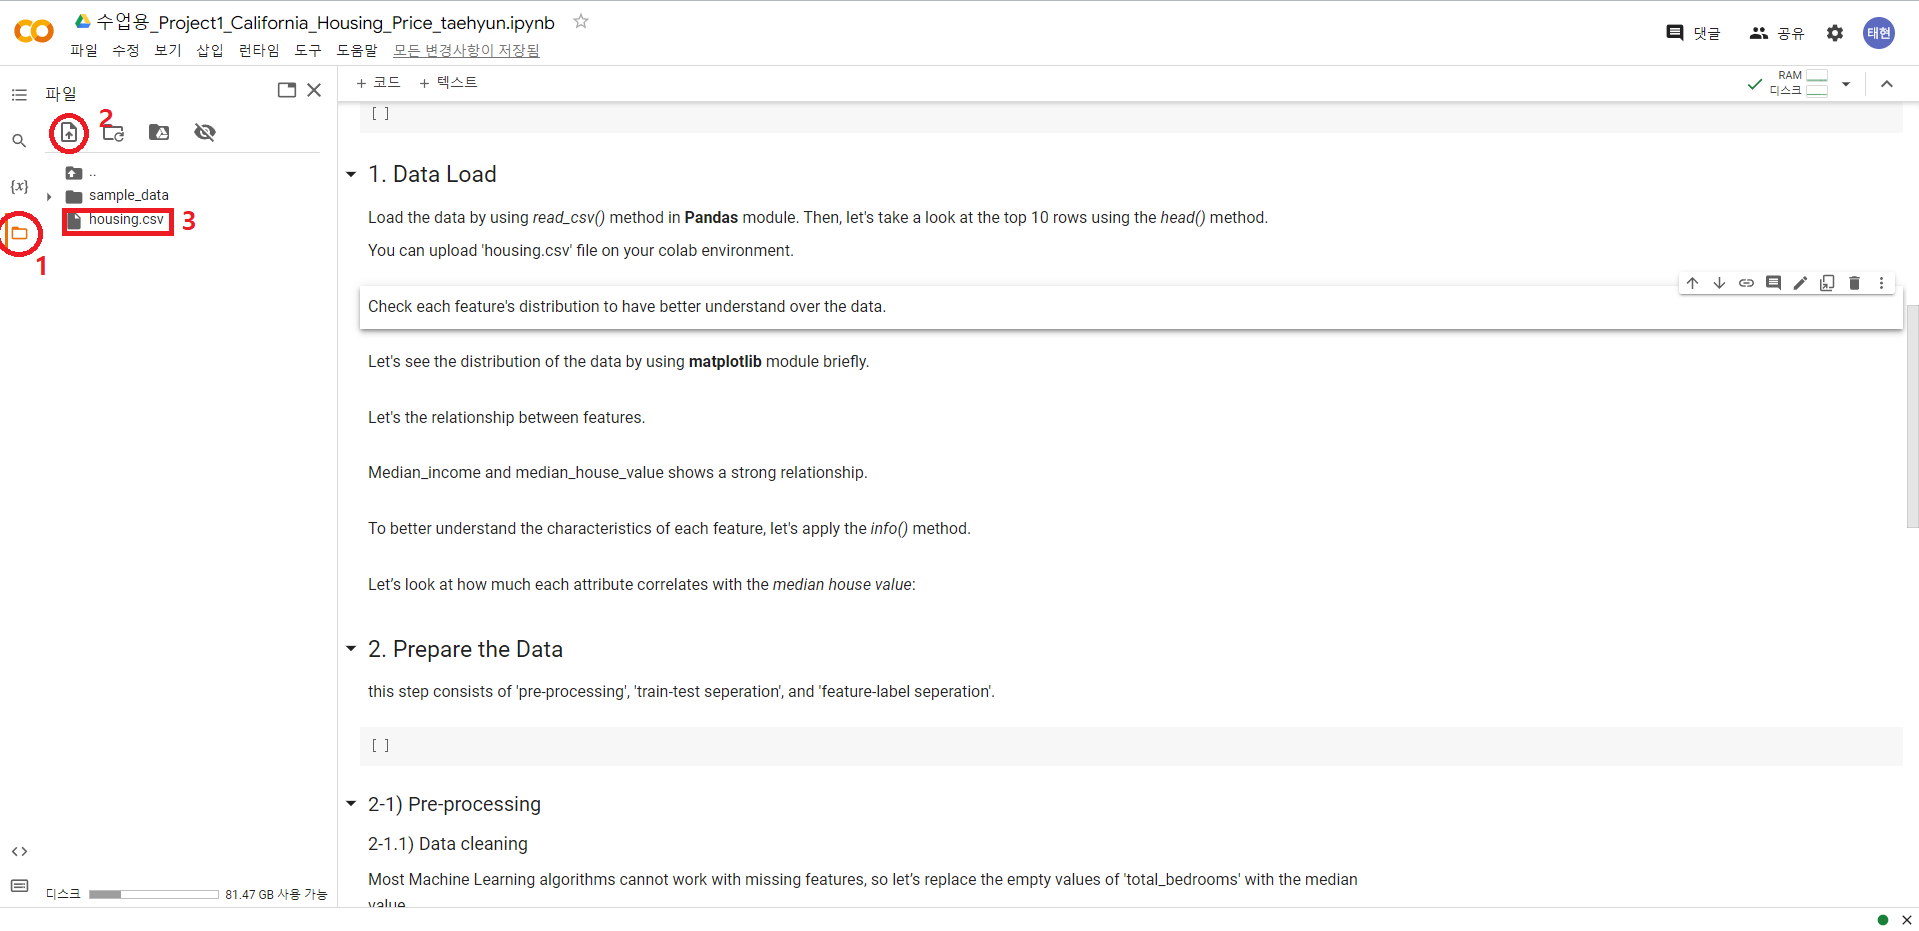

Load the data by using *read_csv()* method in __Pandas__ module. Then, let's take a look at the top 10 rows using the *head()* method.

You can upload 'housing.csv' file on your colab environment.

In [68]:
import pandas as pd

df = pd.read_csv('housing.csv')
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


Check each feature's distribution to have better understand over the data.

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

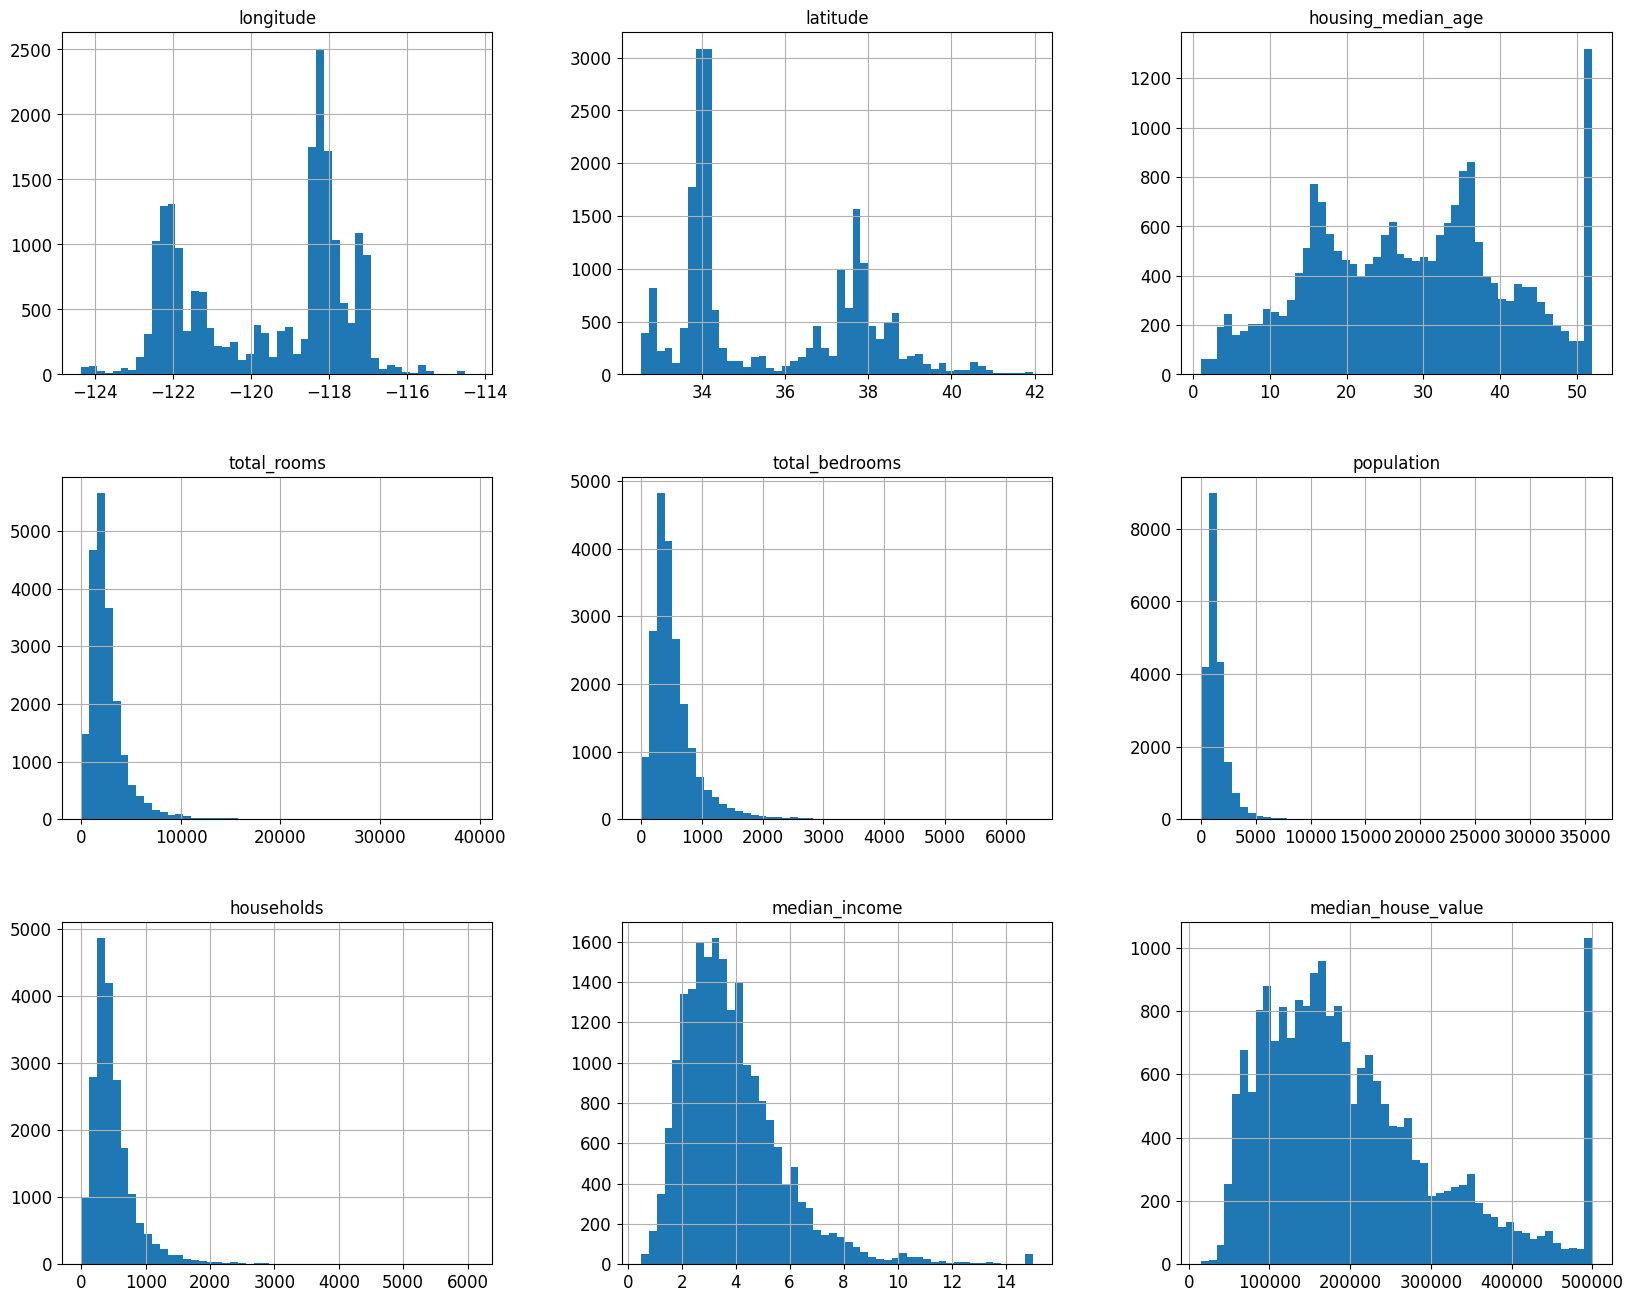

In [69]:
import matplotlib.pyplot as plt

df.hist(bins=50, figsize=(20,16))

Let's see the distribution of the data by using __matplotlib__ module briefly.

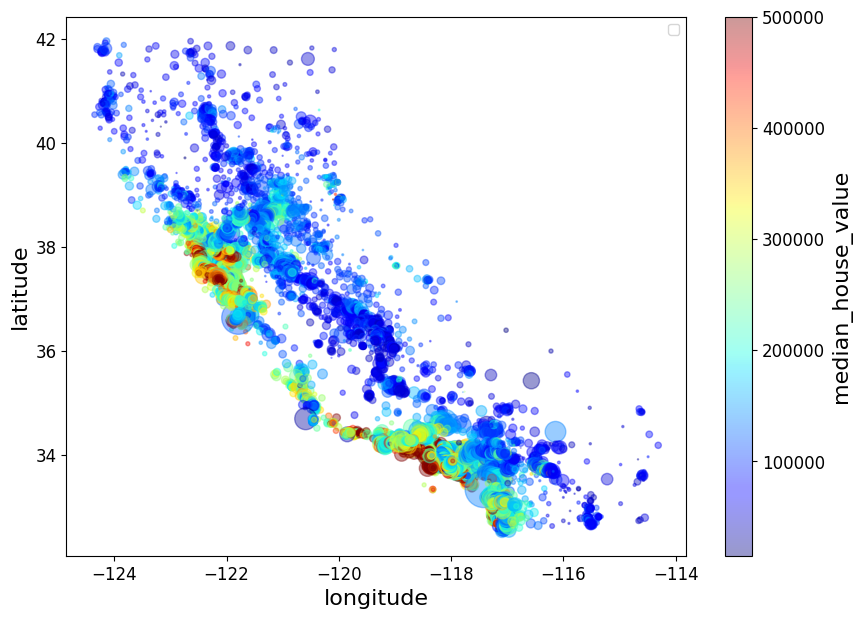

In [70]:
from matplotlib import colorbar
%matplotlib inline

plt.rcParams["axes.labelsize"] = 16
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12

df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
        s=df["population"]/50, figsize=(10,7),
        c="median_house_value", cmap=plt.get_cmap("jet"), colorbar = True)
plt.legend()

### 1-2) Data Correlation

Let's the relationship between features.

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

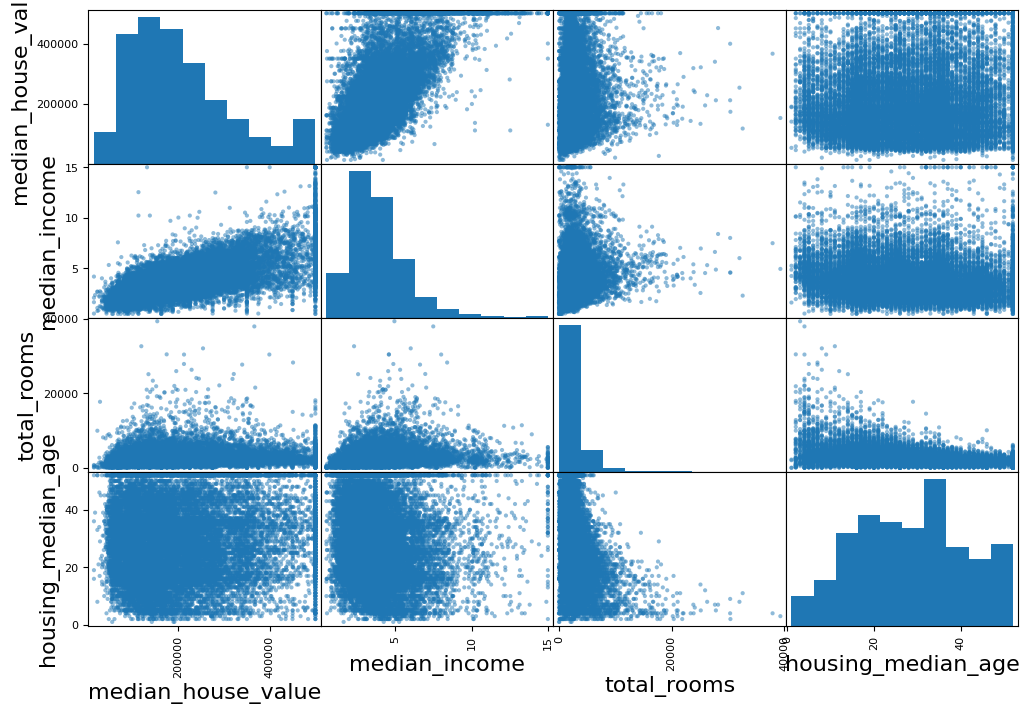

In [71]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(df[attributes], figsize=(12,8))

Median_income and median_house_value shows a strong relationship.

To better understand the characteristics of each feature, let's apply the *info()* method.

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Let’s look at how much each attribute correlates with the *median house value*:

In [73]:
corr_matrix = df.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

<ipython-input-73-5db08072f607>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

## 2. Prepare the Data

this step consists of 'pre-processing', 'train-test seperation', and 'feature-label seperation'.

### 2-1) Pre-processing

#### 2-1.1) Data cleaning
Most Machine Learning algorithms cannot work with missing features, so let’s replace the empty values of 'total_bedrooms' with the median value.

In [74]:
median_value = df["total_bedrooms"].median()
df["total_bedrooms"] = df["total_bedrooms"].fillna(median_value)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


#### 2-1.2) Attributes combinations
*rooms_per_household* is more meaningful than *total_rooms*. Also, *bedrooms_per_room* is more meaningful than *total_bedrooms*.

In [75]:
df["rooms_per_household"] = df["total_rooms"] / df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"] / df["total_rooms"]
del df["total_rooms"], df["total_bedrooms"]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   longitude            20640 non-null  float64
 1   latitude             20640 non-null  float64
 2   housing_median_age   20640 non-null  float64
 3   population           20640 non-null  float64
 4   households           20640 non-null  float64
 5   median_income        20640 non-null  float64
 6   median_house_value   20640 non-null  float64
 7   ocean_proximity      20640 non-null  object 
 8   rooms_per_household  20640 non-null  float64
 9   bedrooms_per_room    20640 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


#### 2-1.3) Feature Scaling
Machine Learning algorithms don’t perform well when the input numerical attributes have very different scales.

__Scikit-Learn__ provides a transformer called *StandardScaler* for *standardization*.

In [78]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

col_list = list(df)
col_list.remove("ocean_proximity")
col_list.remove("median_house_value")

housing_numeric = df[col_list]
housing_scaled = scaler.fit_transform(housing_numeric)
housing_scaled_df = pd.DataFrame(housing_scaled, index=housing_numeric.index, columns = housing_numeric.columns)

df = pd.concat([housing_scaled_df, df["median_house_value"], df["ocean_proximity"]], axis=1)
df.head()


,longitude,latitude,housing_median_age,population,households,median_income,rooms_per_household,bedrooms_per_room,median_house_value,ocean_proximity
0,-1.327835,1.052548,0.982143,-0.974429,-0.977033,2.344766,0.628559,-1.029988,452600.0,NEAR BAY
1,-1.322844,1.043185,-0.607019,0.861439,1.669961,2.332238,0.327041,-0.888897,358500.0,NEAR BAY
2,-1.332827,1.038503,1.856182,-0.820777,-0.843637,1.782699,1.155620,-1.291686,352100.0,NEAR BAY
3,-1.337818,1.038503,1.856182,-0.766028,-0.733781,0.932968,0.156966,-0.449613,341300.0,NEAR BAY
4,-1.337818,1.038503,1.856182,-0.759847,-0.629157,-0.012881,0.344711,-0.639087,342200.0,NEAR BAY


#### 2-1.4) Handling Text and Categorical Attributes
Most Machine Learning algorithms prefer to work with numbers anyway, so let’s convert the 'ocean_proximity' to numbers.

__Pandas__ provides a *get_dummies* method to convert integer categorical values into one-hot vectors.

In [79]:
df = pd.get_dummies(df)
df.head(10)

,longitude,latitude,housing_median_age,population,households,median_income,rooms_per_household,bedrooms_per_room,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.327835,1.052548,0.982143,-0.974429,-0.977033,2.344766,0.628559,-1.029988,452600.0,0,0,0,1,0
1,-1.322844,1.043185,-0.607019,0.861439,1.669961,2.332238,0.327041,-0.888897,358500.0,0,0,0,1,0
2,-1.332827,1.038503,1.856182,-0.820777,-0.843637,1.782699,1.155620,-1.291686,352100.0,0,0,0,1,0
3,-1.337818,1.038503,1.856182,-0.766028,-0.733781,0.932968,0.156966,-0.449613,341300.0,0,0,0,1,0
4,-1.337818,1.038503,1.856182,-0.759847,-0.629157,-0.012881,0.344711,-0.639087,342200.0,0,0,0,1,0
5,-1.337818,1.038503,1.856182,-0.894071,-0.801787,0.087447,-0.269730,0.275563,269700.0,0,0,0,1,0
6,-1.337818,1.033821,1.856182,-0.292712,0.037823,-0.111366,-0.200918,-0.320242,299200.0,0,0,0,1,0
7,-1.337818,1.033821,1.856182,-0.237079,0.385698,-0.395137,-0.255232,0.115458,241400.0,0,0,0,1,0
8,-1.342809,1.033821,1.061601,-0.193810,0.249687,-0.942359,-0.458703,0.712372,226700.0,0,0,0,1,0
9,-1.337818,1.033821,1.856182,0.110844,0.560944,-0.094470,-0.185283,-0.223507,261100.0,0,0,0,1,0


### 2-2) Training and Test Set Seperation
__Scikit-Learn__ provides *train_test_split* function to split dataset into multiple subsets in various ways.

In [80]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
print(f"# of train set: {train_set.shape[0]}, # of test set : {test_set.shape[0]}")

# of train set: 16512, # of test set : 4128


### 2-3) Feature-label seperation
It’s time to prepare the data for your Machine Learning algorithms.

Let’s separate the features and target value to generate the model H(X).

In [81]:
train_set_features = train_set.drop("median_house_value", axis=1)
train_set_target = train_set["median_house_value"].copy()
train_set_features

,longitude,latitude,housing_median_age,population,households,median_income,rooms_per_household,bedrooms_per_room,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
14196,1.267645,-1.367976,0.346478,0.772251,0.322924,-0.321654,-0.166259,-0.202590,0,0,0,0,1
8267,0.703627,-0.871699,1.617807,-0.098440,0.670799,-0.030620,-0.386181,0.289800,0,0,0,0,1
17445,-0.454356,-0.455012,-1.957806,-0.450778,-0.427755,0.150349,0.087641,-0.602454,0,0,0,0,1
14265,1.227714,-1.377340,0.584852,-0.006602,-0.378059,-1.014947,-0.576442,0.681641,0,0,0,0,1
2271,-0.114948,0.537543,1.141059,-0.486983,-0.312669,-0.166583,0.339282,-0.503532,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.803453,-0.867017,0.505394,-0.677723,-0.739013,1.315592,0.282943,-0.960453,1,0,0,0,0
11964,1.067992,-0.754652,0.346478,0.289220,-0.132192,-0.431983,0.581864,-0.443996,0,1,0,0,0
5390,0.593818,-0.749970,0.584852,0.291870,0.071825,-0.492832,-0.582949,0.874058,1,0,0,0,0
860,-1.193070,0.912092,-1.083767,0.310414,0.155525,0.973025,0.390584,-0.717296,1,0,0,0,0
